In [111]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 4\\024')

In [112]:
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='C:\Windows\Fonts\msyh.ttf')
from arch.unitroot import ADF
import numpy as np

# 读取数据

In [113]:
CPI=pd.read_csv('CPI.csv',index_col='time')

# 将数据转换成时间序列格式

In [114]:
CPI.index=pd.to_datetime(CPI.index)

# 查看前3行数据

In [115]:
CPI.head(n=3)

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


# 查看后3行数据

In [118]:
CPI.tail(n=3)

,CPI
time,
2001-03-01,99.4
2001-02-01,100.2
2001-01-01,101.9


In [119]:
CPI.shape

(161, 1)

# 剔除最后3期数据,构造用于建模的数据子集

In [120]:
CPItrain=CPI[3:]
CPItrain.head(n=3)

,CPI
time,
2014-02-01,100.5
2014-01-01,101.0
2013-12-01,100.3


In [10]:
import matplotlib.pyplot as plt 
import matplotlib

# 绘制时序图，直观了解数据情况(含.plot()函数新用法)

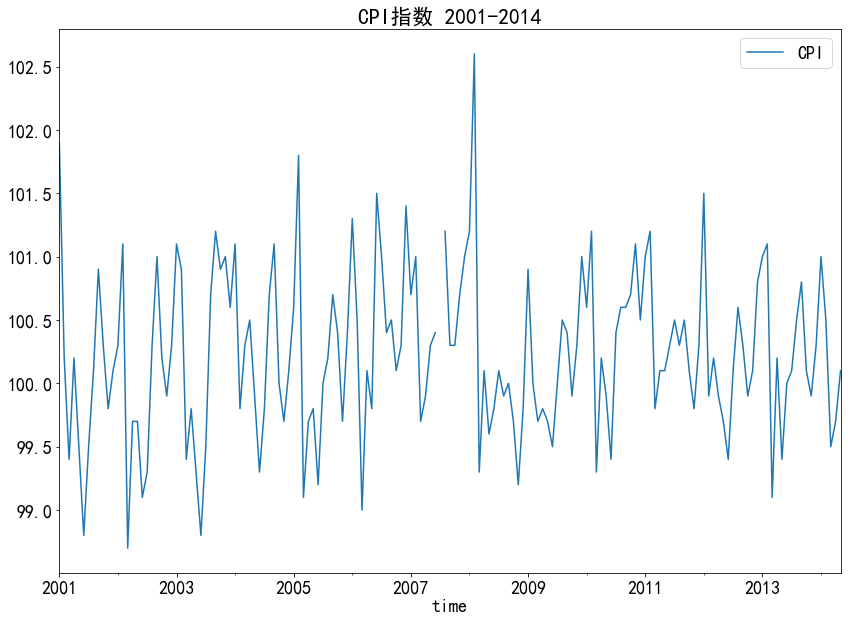

In [121]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=80) 
CPI.sort_index().plot(title='CPI指数 2001-2014',figsize=(14,10))

# 进行ADF单位根检验，并查看结果

In [122]:
CPItrain=CPItrain.dropna().CPI
print(ADF(CPItrain,max_lags=10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.900
P-value                         0.045
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# lag即为上述检验表达式中的m，在这里我们选择检验12阶的自相关系数

In [123]:
LjungBox=stattools.q_stat(stattools.acf(CPItrain)[1:12],len(CPItrain))
LjungBox[1][-1] 

0.00055601289485153623

# 将画面一分为二
# 在第一个画面中画出序列的自相关系数图 
# 在第二个画面中画出序列的偏自相关系数图

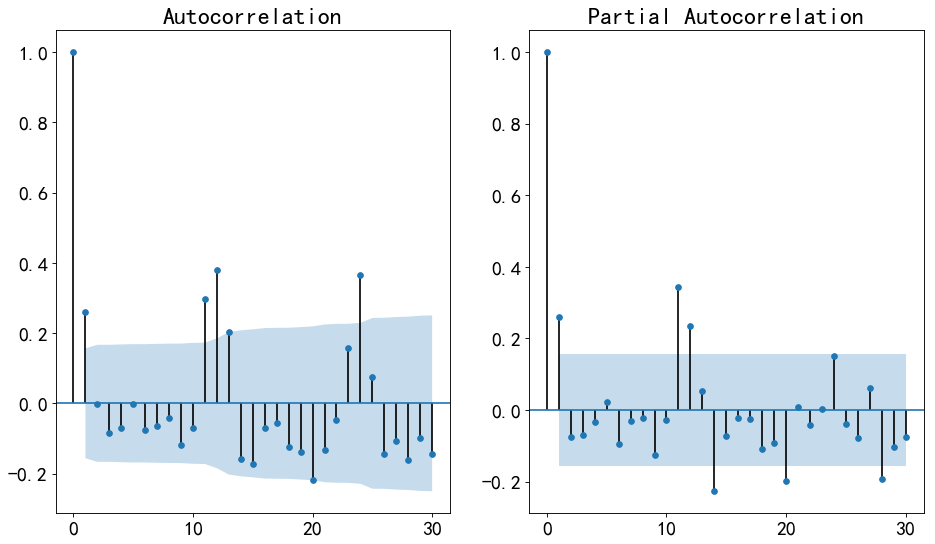

In [124]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(121)
axe2=plt.subplot(122)

plot1=plot_acf(CPItrain,lags=30,ax=axe1)

plot2=plot_pacf(CPItrain,lags=30,ax=axe2)

# order表示建立的模型的阶数，c(1,0,1)表示建立的是ARMA(1,1)模型；
# 中间的数字0表示使用原始的、未进行过差分（差分次数为0）的数据；
# 此处我们无需考虑它

In [126]:
model1=arima_model.ARIMA(CPItrain,order=(1,0,1)).fit()
print(model1.summary())

                              ARMA Model Results                              
Dep. Variable:                    CPI   No. Observations:                  157
Model:                     ARMA(1, 1)   Log Likelihood                -150.339
Method:                       css-mle   S.D. of innovations              0.630
Date:                Wed, 28 Feb 2018   AIC                            308.678
Time:                        14:09:34   BIC                            320.903
Sample:                    02-01-2014   HQIC                           313.643
                         - 01-01-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2373      0.066   1516.139      0.000     100.108     100.367
ar.L1.CPI      0.0934      0.248      0.377      0.707      -0.392       0.579
ma.L1.CPI      0.1932      0.240      0.805      0.4

# 同理，我们建立起其它阶数的模型

In [127]:
model2=arima_model.ARIMA(CPItrain,order=(1,0,2)).fit()
print(model2.summary())

                              ARMA Model Results                              
Dep. Variable:                    CPI   No. Observations:                  157
Model:                     ARMA(1, 2)   Log Likelihood                -148.889
Method:                       css-mle   S.D. of innovations              0.621
Date:                Wed, 28 Feb 2018   AIC                            307.779
Time:                        14:10:03   BIC                            323.060
Sample:                    02-01-2014   HQIC                           313.985
                         - 01-01-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2366      0.063   1582.038      0.000     100.112     100.361
ar.L1.CPI     -0.9394      0.034    -27.485      0.000      -1.006      -0.872
ma.L1.CPI      1.2414      0.084     14.829      0.0

In [128]:
model3=arima_model.ARIMA(CPItrain,order=(2,0,1)).fit()
model4=arima_model.ARIMA(CPItrain,order=(2,0,2)).fit()
model5=arima_model.ARIMA(CPItrain,order=(3,0,1)).fit()
model6=arima_model.ARIMA(CPItrain,order=(3,0,2)).fit()

In [129]:
model6.conf_int()

,0,1
const,100.093869,100.379723
ar.L1.CPI,1.301692,1.609373
ar.L2.CPI,-1.478539,-1.109157
ar.L3.CPI,0.205484,0.503178
ma.L1.CPI,-1.313938,-1.183402
ma.L2.CPI,0.946969,1.053031


# 绘制时间序列模拟的诊断图

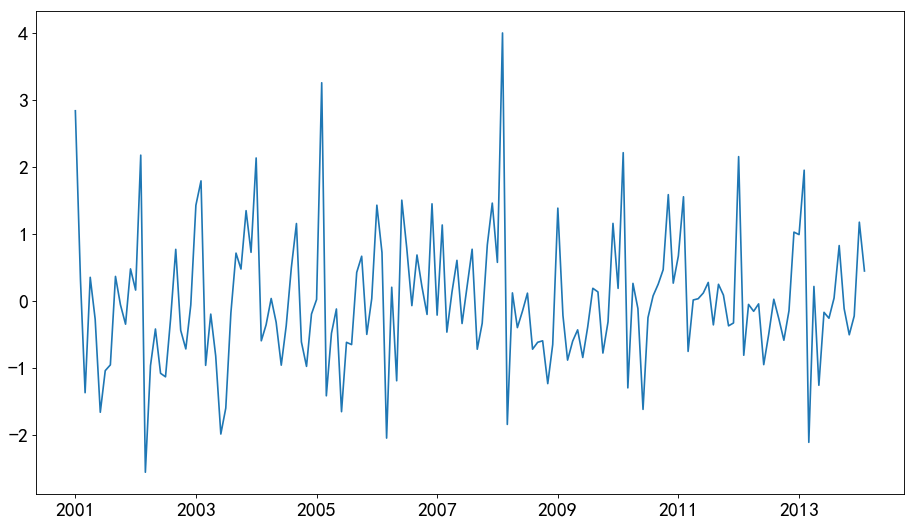

In [130]:
stdresid=model6.resid/math.sqrt(model6.sigma2)
plt.figure(figsize=(14,8),dpi=80)
plt.plot(stdresid)

# 使用画布绘制自相关图

In [30]:
import matplotlib.pyplot as plt 
import matplotlib

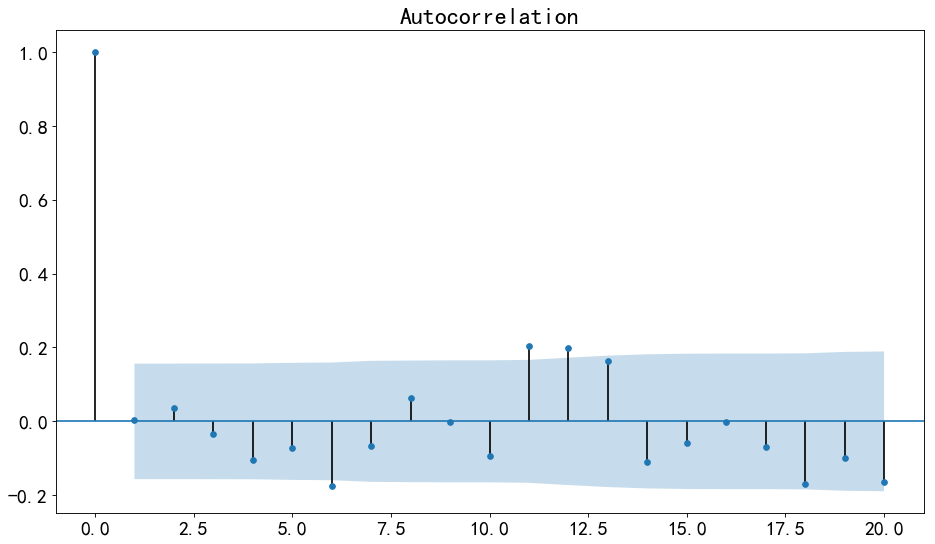

In [131]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(stdresid,lags=20,ax=axe1)

In [132]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

0.0157220221384534

In [133]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
LjungBox[1][-1]

0.003412739009005275

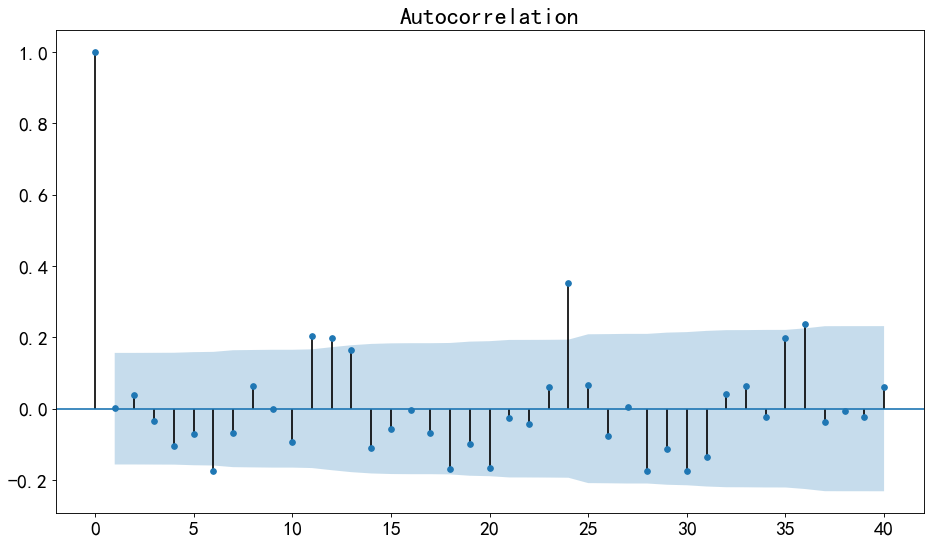

In [134]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(stdresid,lags=40,ax=axe1)

In [135]:
model6.forecast(3)[0]
CPI.head(3)

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


# 上证指数的平稳时间序列建模

In [136]:
Datang=pd.read_csv('Datang.csv',index_col='time')
Datang.index=pd.to_datetime(Datang.index)
Datang.head()

,datang
time,
2008-01-02,0.0000
2008-01-03,2.2152
2008-01-04,0.1548
2008-01-07,1.8547
2008-01-08,-0.1517


In [137]:
returns=Datang.datang['2014-01-01':'2016-01-01']
returns.head(n=3)

time
2014-01-29   -1.3388
2014-03-03   -1.9717
2014-03-04    7.1171
Name: datang, dtype: float64

In [138]:
returns.tail(n=3)

time
2015-12-29    6.1665
2015-12-30    6.8643
2015-12-31   -6.2334
Name: datang, dtype: float64

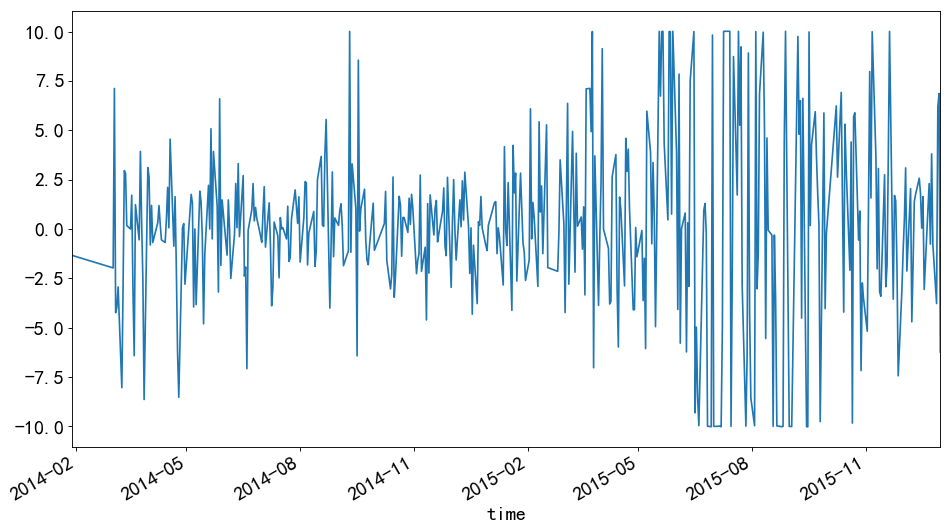

In [139]:
plt.figure(figsize=(14,8),dpi=80)
returns.plot()

In [141]:
print(ADF(returns).summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -18.288
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [142]:
stattools.q_stat(stattools.acf(returns)[1:12],len(returns))[1]

array([ 0.00203329,  0.00734689,  0.01341783,  0.01713763,  0.02968939,
        0.04376739,  0.0415143 ,  0.008257  ,  0.01109367,  0.00375598,
        0.00635125])

In [143]:
pd.Series(stattools.q_stat(stattools.acf(returns)[1:12],len(returns))[1])

0     0.002033
1     0.007347
2     0.013418
3     0.017138
4     0.029689
5     0.043767
6     0.041514
7     0.008257
8     0.011094
9     0.003756
10    0.006351
dtype: float64

In [144]:
stattools.arma_order_select_ic(returns,max_ma=4)

E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning

{'bic':              0            1            2            3            4
 0  2648.315604  2644.994667  2651.064144  2655.513492  2660.083396
 1  2644.849429  2650.947706  2656.760317  2660.365910  2666.157088
 2  2650.956398  2655.141359  2660.643964  2664.360669  2668.440769
 3  2656.355363  2660.463073  2661.428981  2664.708086  2671.990850
 4  2660.392132  2665.919443  2668.487693  2673.650501  2677.892061,
 'bic_min_order': (1, 0)}

In [145]:
model=arima_model.ARIMA(returns,order=(1,0,0)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 datang   No. Observations:                  453
Model:                     ARMA(1, 0)   Log Likelihood               -1313.251
Method:                       css-mle   S.D. of innovations              4.393
Date:                Wed, 28 Feb 2018   AIC                           2632.502
Time:                        14:12:55   BIC                           2644.849
Sample:                    01-29-2014   HQIC                          2637.367
                         - 12-31-2015                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.241      0.587      0.557      -0.331       0.615
ar.L1.datang     0.1449      0.047      3.112      0.002       0.054       0.236
                                    Roots   

In [146]:
model.conf_int()

,0,1
const,-0.331197,0.614627
ar.L1.datang,0.053630,0.236092


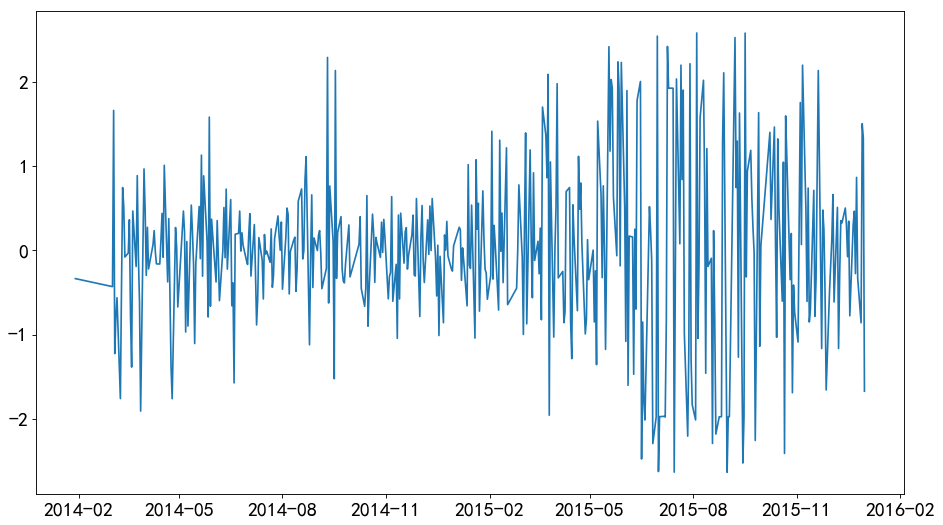

In [147]:
stdresid=model.resid/math.sqrt(model.sigma2)
plt.figure(figsize=(14,8),dpi=80)
plt.plot(stdresid)

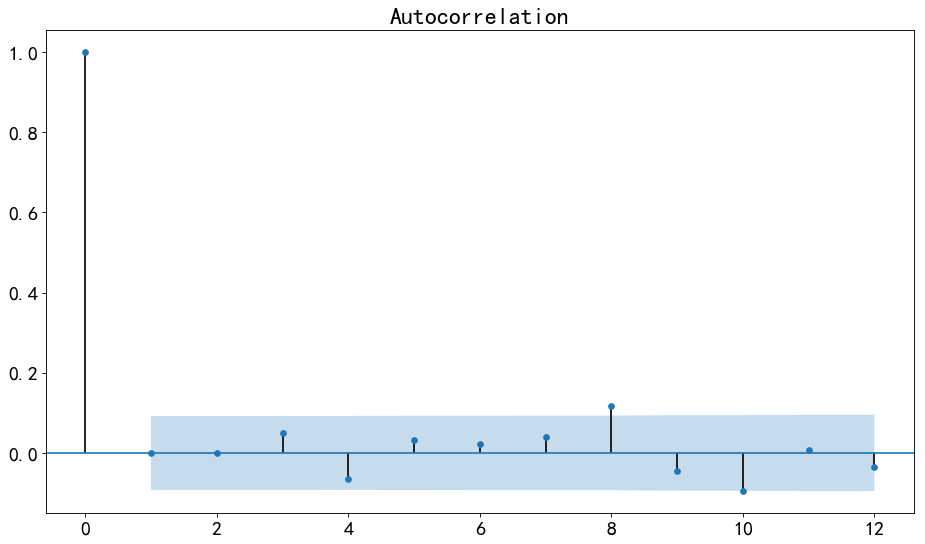

In [148]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(stdresid,lags=12,ax=axe1)

In [149]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:12],len(stdresid))
LjungBox[1]

array([ 0.99403745,  0.99951032,  0.77556437,  0.53780004,  0.60674725,
        0.69723698,  0.70864822,  0.21276689,  0.22902477,  0.10008502,
        0.14108631])

In [150]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

In [151]:
import statsmodels.tsa.arima_process as sm
from statsmodels.graphics.tsaplots import *

# 4.使用python模拟一个长度为200期的AR(1)模型，X(t)=0.6X(t-1)+ ξ(t)。绘制其ACF图与PACF图，根据这两幅图选择模型

In [152]:
arma=sm.ArmaProcess([-1,-0.6],[1])
sample=arma.generate_sample(200)

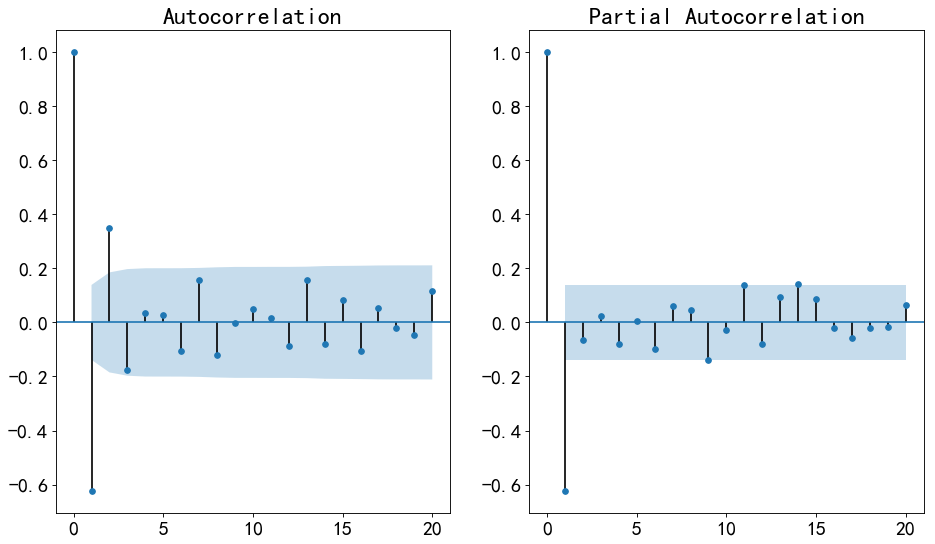

In [153]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(121)
axe2=plt.subplot(122)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(sample,lags=20,ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_pacf(sample,lags=20,ax=axe2)

# 5.使用python模拟一个长度为100期的MA(1)模型，X(t)=-0.4X(t-1)+ ξ(t)。绘制其ACF图与PACF图，根据这两幅图选择模型

In [154]:
arma=sm.ArmaProcess([-1],[1,0.4])
sample=arma.generate_sample(200)

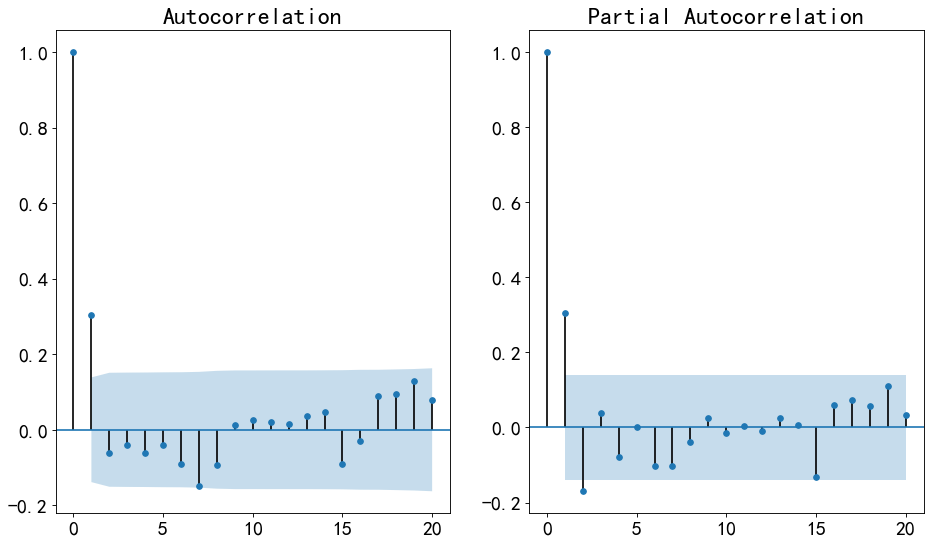

In [155]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(121)
axe2=plt.subplot(122)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(sample,lags=20,ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_pacf(sample,lags=20,ax=axe2)

# 6.使用python生成100个随机数，然后将其转换成时间序列
# ①判断得到的数据是否是白噪声

In [156]:
import statsmodels.tsa.arima_process as sm
from statsmodels.graphics.tsaplots import *
import numpy as np
import pandas as pd
numbers=np.random.normal(size=100)
numbers=pd.Series(numbers)

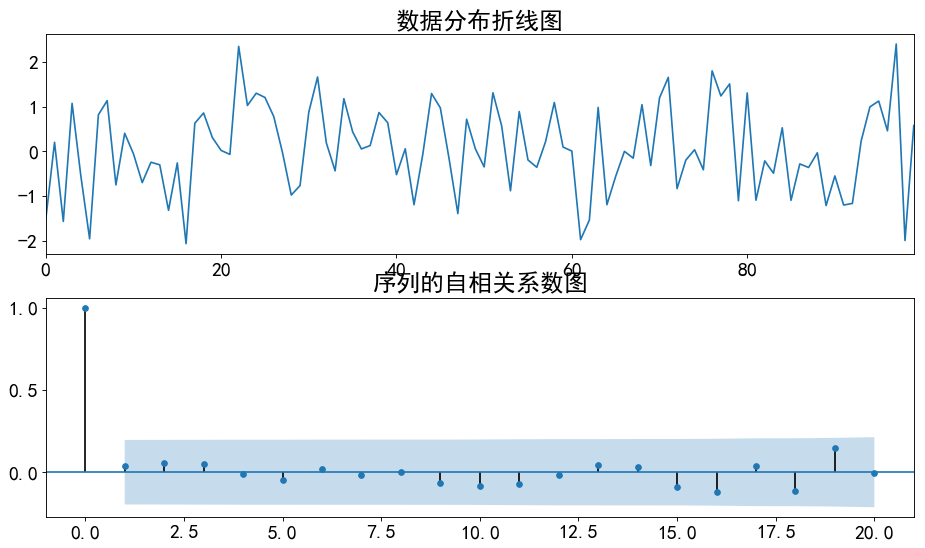

In [157]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(211)
axe2=plt.subplot(212)
#在第一个画面中画出序列的数据分布折线图 
plot1=numbers.plot(ax=axe1,title='数据分布折线图')
#在第二个画面中画出序列的自相关系数图
plot2=plot_acf(numbers,lags=20,ax=axe2,title='序列的自相关系数图')

In [158]:
from statsmodels.tsa import stattools
stattools.arma_order_select_ic(numbers.values,max_ma=4)

E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeW

{'bic':             0           1           2           3           4
 0  289.477774  293.941978  298.238650  302.517811  307.097209
 1  293.926454  298.280467  302.696973  307.113810  308.887702
 2  298.210210  302.577322         NaN  308.375277  311.679464
 3  302.593398  307.179788  310.550014  312.782439  316.342638
 4  307.134836  308.713166  315.012860  317.617953         NaN,
 'bic_min_order': (0, 0)}

# 7.获取中国石油2013年度的收盘价数据
# ①绘制时间序列图与ACF图，判断其是否平稳

In [159]:
zgsy=pd.read_csv('Data/Part4/003/zgsy.csv')
clprice=zgsy.iloc[:,4]

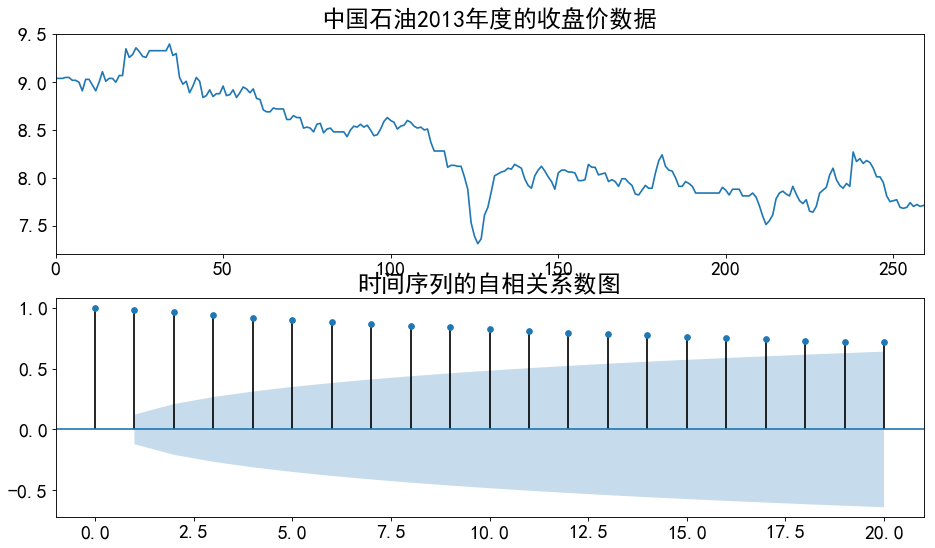

In [160]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(211)
axe2=plt.subplot(212)
#在第一个画面中画出序列的数据分布折线图 
plot1=clprice.plot(ax=axe1,title='中国石油2013年度的收盘价数据')
#在第二个画面中画出序列的自相关系数图
plot2=plot_acf(clprice,lags=20,ax=axe2,title='时间序列的自相关系数图')

# ②进行ADF检验，进一步验证①中的结论

In [161]:
from arch.unitroot import ADF
adf=ADF(clprice,lags=6)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.185
P-value                         0.680
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# ③计算中国石油的连续复利收益率序列并绘制时间序列图

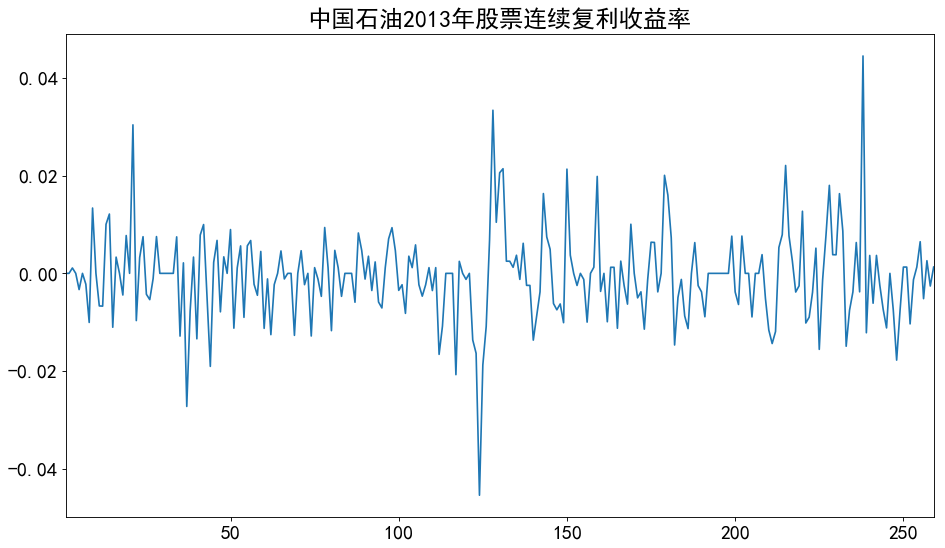

In [162]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
logReturn=pd.Series((np.log(clprice))).diff().dropna()
plot1=logReturn.plot(ax=axe1,title='中国石油2013年股票连续复利收益率')

# ④进行ADF检验，判断收益率序列是不是平稳序列

In [163]:
adf=ADF(logReturn,lags=6)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.402
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# ⑤若收益率序列为平稳序列，绘制ADF图与PACF图以选择模型

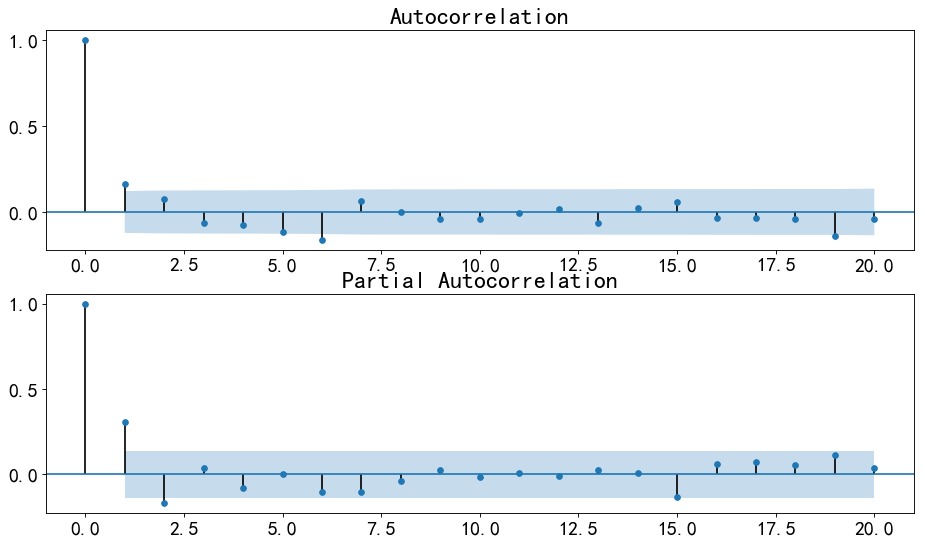

In [164]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(211)
axe2=plt.subplot(212)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(logReturn,lags=20,ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_pacf(sample,lags=20,ax=axe2)

# ⑥估计模型中的参数，并写出拟合的模型

In [165]:
from statsmodels.tsa import arima_model
model1=arima_model.ARIMA(logReturn.values,order=(0,0,1)).fit()
print(model1.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  259
Model:                     ARMA(0, 1)   Log Likelihood                 850.285
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 28 Feb 2018   AIC                          -1694.570
Time:                        14:13:50   BIC                          -1683.899
Sample:                             0   HQIC                         -1690.279
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.953      0.342      -0.002       0.001
ma.L1.y        0.1411      0.056      2.505      0.013       0.031       0.252
                                    Roots           

In [166]:
model2=arima_model.ARIMA(logReturn.values,order=(1,0,0)).fit()
print(model2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  259
Model:                     ARMA(1, 0)   Log Likelihood                 850.706
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 28 Feb 2018   AIC                          -1695.411
Time:                        14:13:51   BIC                          -1684.741
Sample:                             0   HQIC                         -1691.121
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.913      0.362      -0.002       0.001
ar.L1.y        0.1615      0.061      2.638      0.009       0.042       0.281
                                    Roots           

# 8.以白云机场2012年的收盘价作为原数据
# ①计算收益率序列并绘制时间序列图

In [167]:
baiyun=zgsy=pd.read_csv('Data/Part4/003/baiyun.csv',index_col='Date')
baiyun.index=pd.to_datetime(baiyun.index)
clprice=baiyun.Close

In [168]:
len(logReturn)

259

In [169]:
logReturn.head()

1    0.000000
2    0.000000
3    0.001106
4    0.000000
5   -0.003320
Name: 601857.SS.Close, dtype: float64

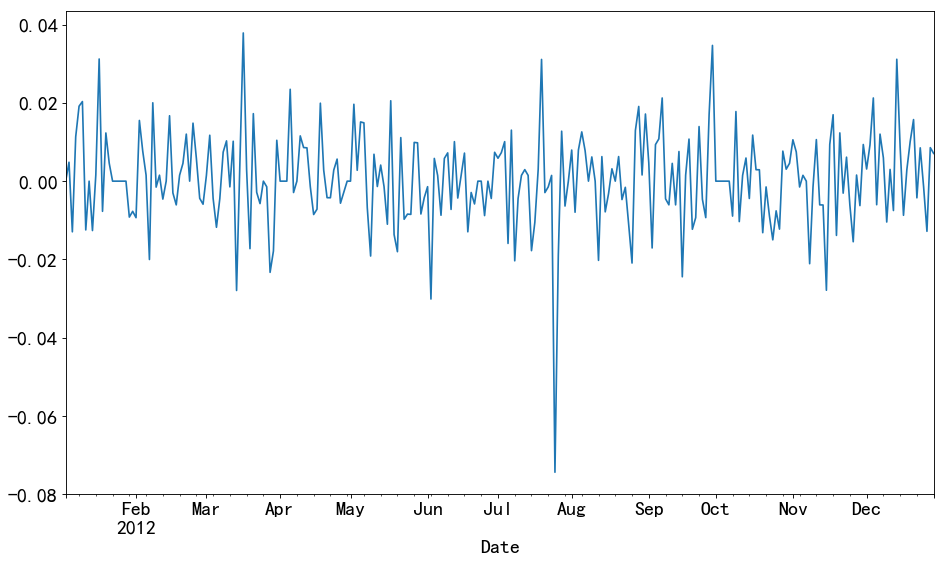

In [170]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
logReturn=pd.Series((np.log(clprice))).diff().dropna()
plot1=logReturn.plot() 

# ②进行ADF检验，判断收益率序列是否平稳

In [171]:
adf=ADF(logReturn,lags=6)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.189
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# ③绘制ADF图与PACF图，根据AIC选择出最佳模型

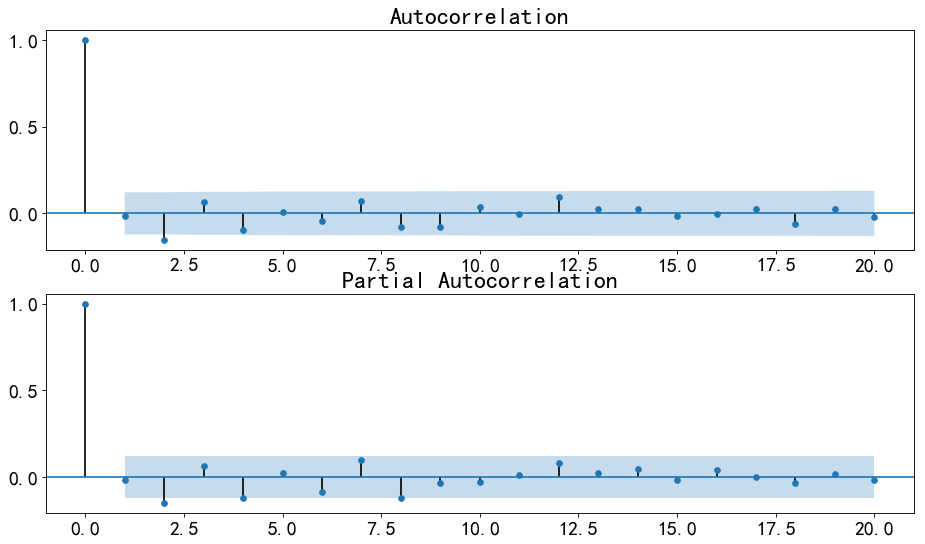

In [172]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(211)
axe2=plt.subplot(212)
#在第一个画面中画出序列的自相关系数图 
plot1=plot_acf(logReturn,lags=20,ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_pacf(logReturn,lags=20,ax=axe2)

In [173]:
model1=arima_model.ARIMA(logReturn.values,order=(0,0,2)).fit()
model2=arima_model.ARIMA(logReturn.values,order=(2,0,0)).fit()
print("模型1AIC结果为：% s"% model1.aic)
print("模型2AIC结果为：% s"% model2.aic)

模型1AIC结果为：-1563.422363156586
模型2AIC结果为：-1561.4132520773032


# ④对模型进行诊断

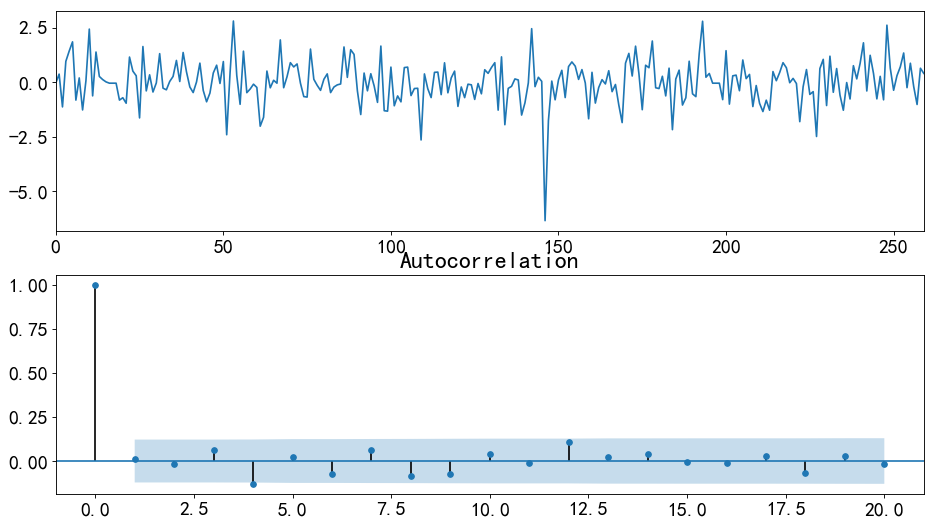

In [174]:
import math
stdresid=model2.resid/math.sqrt(model2.sigma2)
stdresid2=pd.Series(stdresid)
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(211)
axe2=plt.subplot(212)
#在第一个画面中画出序列的自相关系数图 
plot1=stdresid2.plot(ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_acf(stdresid,lags=20,ax=axe2)

In [98]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1] 

0.21712611456922928

# ⑤预测未来10期的收盘价数据

In [175]:
forecast=pd.Series(model2.forecast(10)[0])

In [176]:
pd.Series(forecast)

0   -0.000830
1   -0.000457
2    0.000734
3    0.000655
4    0.000476
5    0.000492
6    0.000518
7    0.000516
8    0.000512
9    0.000512
dtype: float64

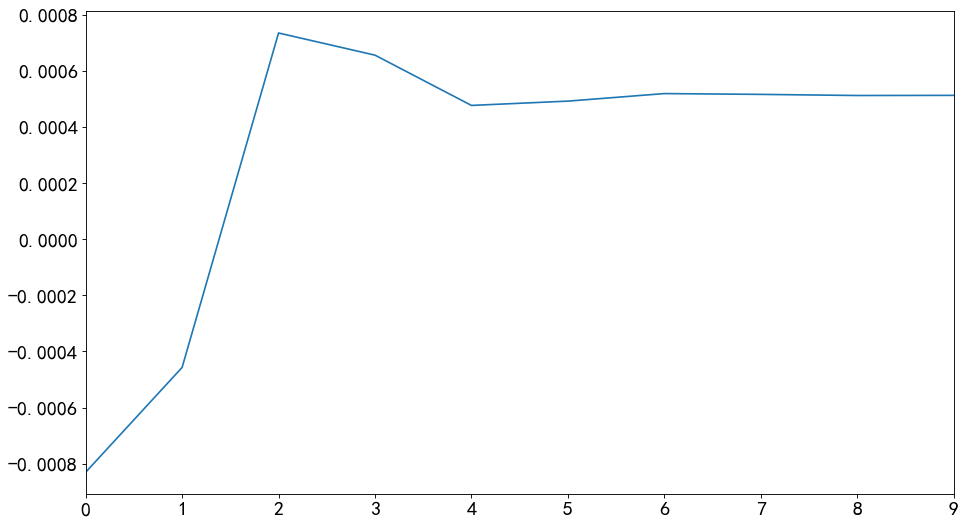

In [99]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=pd.Series(model2.forecast(10)[0]).plot(ax=axe1)